In [ ]:
import pandas as pd
from pandas import read_csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/breast-cancer.csv')
data.sample(10)

# mengimport datasets ke pandas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
54,857438,M,15.100,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,...,18.10,31.69,117.70,1030.0,0.1389,0.2057,0.2712,0.15300,0.2675,0.07873
271,8910748,B,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,...,12.32,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.08750,0.2733,0.08022
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.17500,0.4228,0.11750
247,884626,B,12.890,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,...,14.39,17.70,105.00,639.1,0.1254,0.5849,0.7727,0.15610,0.2639,0.11780
129,866674,M,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,...,22.63,33.58,148.70,1589.0,0.1275,0.3861,0.5673,0.17320,0.3305,0.08465
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
103,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,...,10.76,26.83,72.22,361.2,0.1559,0.2302,0.2644,0.09749,0.2622,0.08490
51,857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
527,91813702,B,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.1791,0.10700,0.3110,0.07592
544,922297,B,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.1377,0.06845,0.2249,0.08492


In [ ]:
data.info()

#total ada sebanyal 569 data dengan total kolom 31 dan tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop('id', axis=1, inplace=True)
data.head()

# Menghapus kolom id karena tidak diperlukan

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe()
# Describe menampilkan count, mean, standar deviation, min, max, 25%, 50%, dan 75% dari atribut yang berupa angka dari kolom2 numerik dataset ini.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.isnull().sum()

# datanya bersih tidak ada missing value

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


<ipython-input-27-dc0d60a14144>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette="Set2")


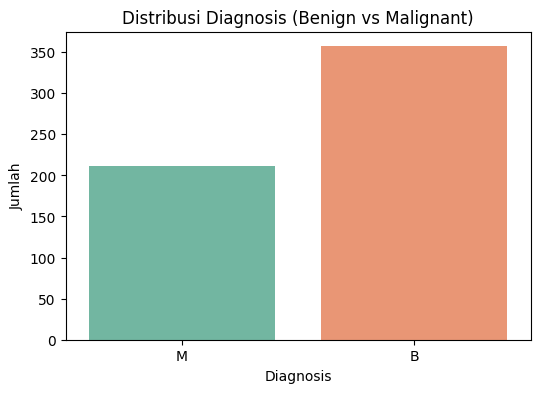

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=data, palette="Set2")
plt.title('Distribusi Diagnosis (Benign vs Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan jumlah kasus "benign" dan "malignant" dalam dataset ini.

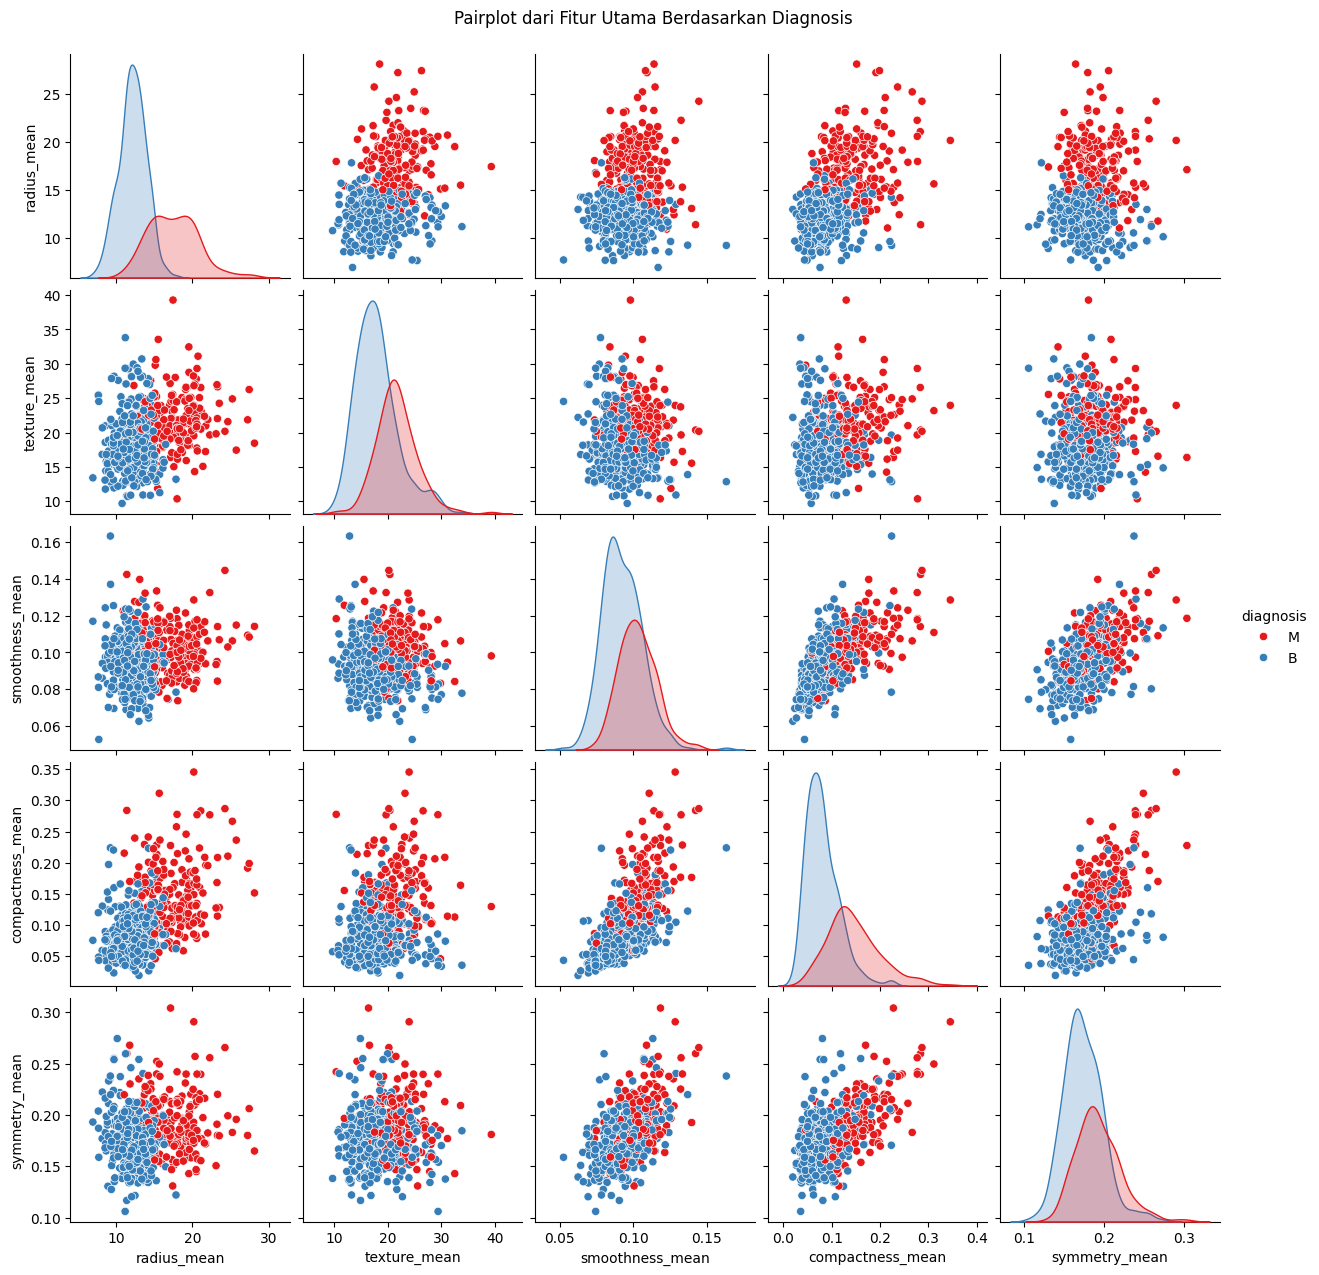

In [ ]:
features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']
sns.pairplot(data[features + ['diagnosis']], hue="diagnosis", palette="Set1")
plt.suptitle("Pairplot dari Fitur Utama Berdasarkan Diagnosis", y=1.02)
plt.show()

# Jika radius_mean semakin besar dan area texture_mean semakin luas maka diagnosisnya malignant.


<ipython-input-29-94734a08f80f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette="Set3")


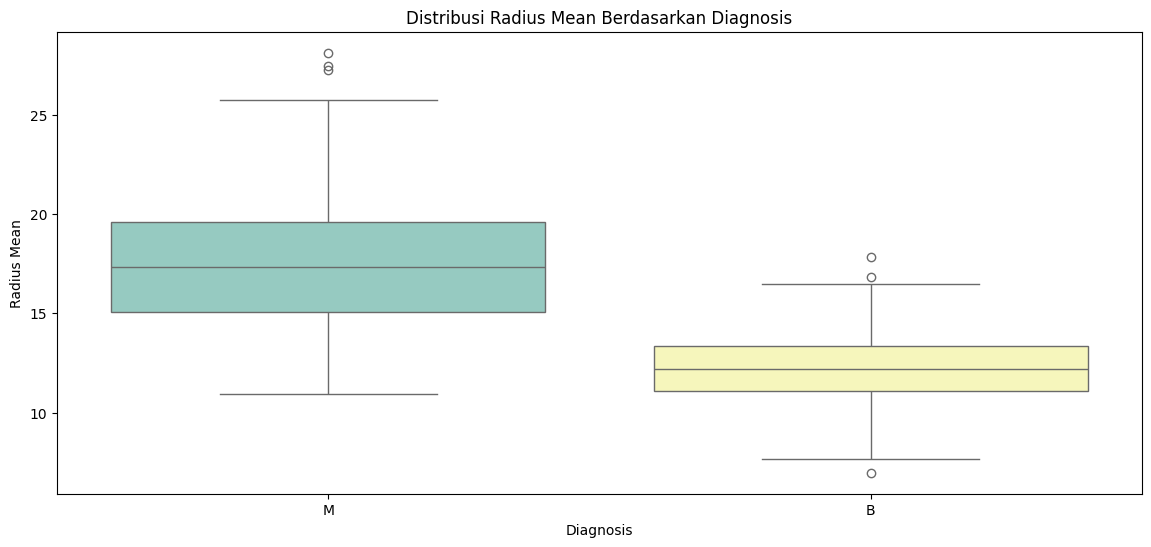

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette="Set3")
plt.title('Distribusi Radius Mean Berdasarkan Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

# Boxplot untuk membandingkan distribusi nilai radius_mean berdasarkan diagnosis.

In [ ]:
label_encoder = LabelEncoder()

data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

data.head()

# Mengubah seluruh nilai pada kolom diagnosis yang awalnya categorical menajadi numeric.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.columns
# Menampilkan semua kolom

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']

# X digunakan untuk membuat prediksi, y adalah target atau output yang ingin diprediksi.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Membagi dataset X dan y menjadi training dan testing data dengan pembagian 80% untuk training dan 20% untuk testing

X_train.shape, X_test.shape
# Menampilkan ukuran atau dimensi dari data latih (X_train) dan data uji (X_test) dalam bentuk tuple.

((455, 30), (114, 30))

**DECISION TREE**

1. Entropy

In [ ]:
ent = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
ent.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_ent = ent.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria entropy.

print(f'Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_ent):.4f}')
# Menampilkan akurasi dari kriteria entropy berdasarkan y_test dan y_pred_ent.

Model accuracy score with criterion entropy: 0.9561


In [ ]:
y_train_ent = ent.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_ent)
training_acc = accuracy_score(y_train, y_train_ent)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_ent, y_train, dan y_train_ent.
# Perbedaan antara training set score dan test set score sekitar 0.0241 antara training set dan test set menunjukkan bahwa model tidak mengalami overfitting yang signifikan.

Training set score: 0.9802
Test set score: 0.9561


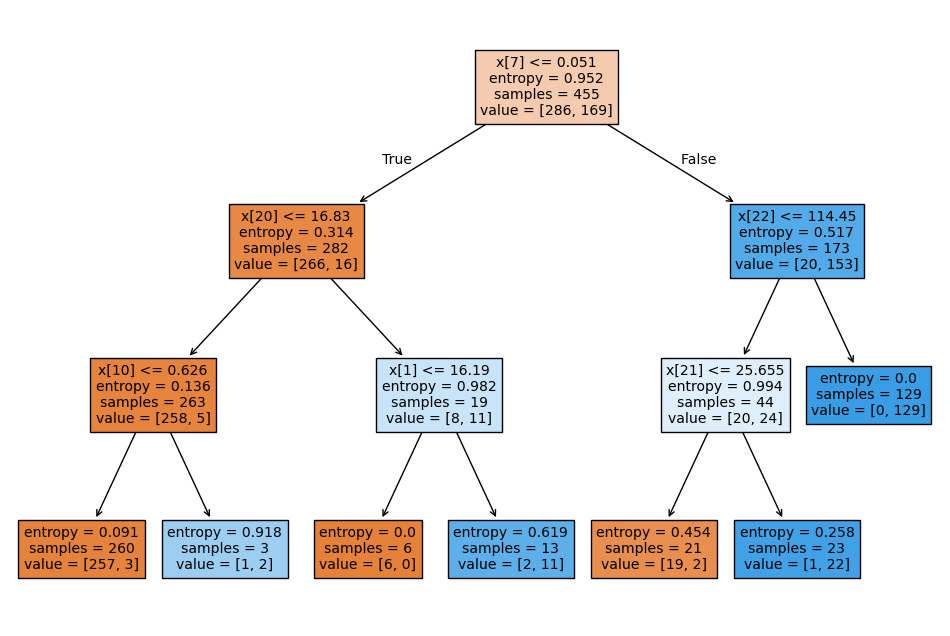

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(ent, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

2. Gini Index

In [ ]:
gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
gini.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = gini.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria gini.

print(f'Model accuracy score with criterion gini: {accuracy_score(y_test, y_pred_gini):.4f}')
# Menampilkan akurasi dari kriteria gini berdasarkan y_test dan y_pred_gini.

Model accuracy score with criterion gini: 0.9386


In [ ]:
y_train_gini = gini.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_gini)
training_acc = accuracy_score(y_train, y_train_gini)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_gini, y_train, dan y_train_gini.
# Perbedaan antara kedua skor ini sekitar 0.0394 antara training set score dan test set score menunjukkan bahwa model mungkin mengalami sedikit overfitting.

Training set score: 0.9780
Test set score: 0.9386


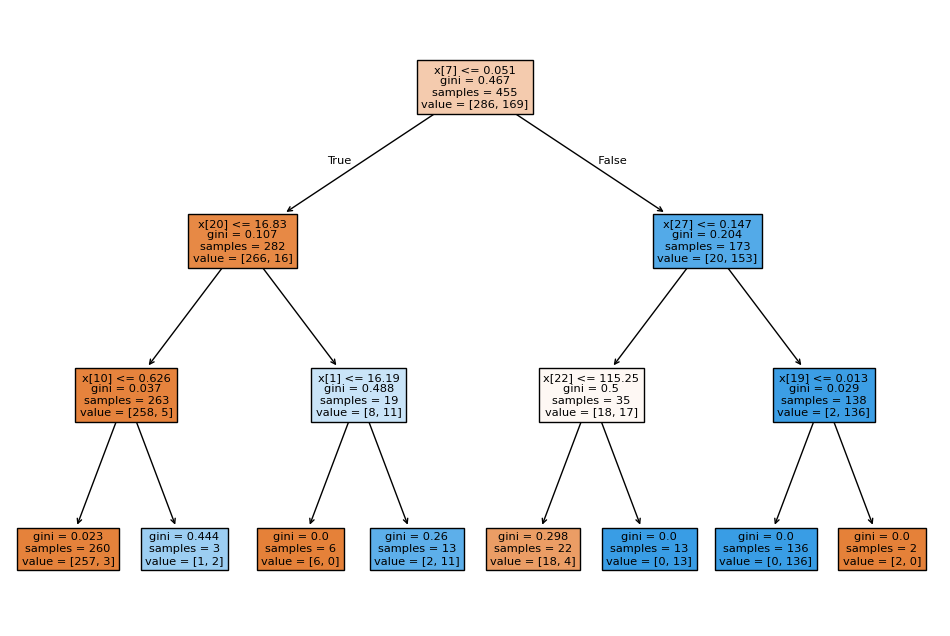

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(gini, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

# Membuat model dengan menggunakan Logistic Regression.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_logisticReg = logisticRegression.predict(X_test)
# Untuk menghasilkan prediksi menggunakan Logistic Regression.

In [ ]:
accuracy = accuracy_score(y_test, y_pred_logisticReg)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_logisticReg.

Accuracy Score: 0.9561


In [ ]:
y_train_logisticReg = logisticRegression.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_logisticReg)
training_acc = accuracy_score(y_train, y_train_logisticReg)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_logisticReg, y_train, dan y_train_logisticReg.
# Terdapat perbedaan hanya 0.0001, ini menunjukkan bahwa model memiliki performa yang sangat baik pada data uji.

Training set score: 0.9560
Test set score: 0.9561


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 11 # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy:.4f}")
# Untuk menghasilkan prediksi menggunakan KNN.

Accuracy Score: 0.9825


In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari KNN berdasarkan y_test dan y_pred_knn.

Accuracy Score: 0.9825


In [ ]:
y_train_knn = knn.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_knn)
training_acc = accuracy_score(y_train, y_train_knn)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")
# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_knn, y_train, dan y_train_knn.
# Test set score yang tinggi 0.9825 menunjukkan bahwa model mampu mengklasifikasikan data dengan sangat baik pada data baru

Training set score: 0.9319
Test set score: 0.9825


In [ ]:
cm_entropy = confusion_matrix(y_test, y_pred_ent)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_logisticReg = confusion_matrix(y_test, y_pred_logisticReg)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_logisticReg)
print("\nConfusion Matrix KNN:")
print(cm_knn)


# Menampilkan confusion matrix dari kriteria entropy, kriteria gini index, Naive Bayes, dan KNN.

Confusion Matrix Entropy:
[[70  1]
 [ 4 39]]

Confusion Matrix Gini:
[[68  3]
 [ 4 39]]

Confusion Matrix Naive Bayes:
[[70  1]
 [ 4 39]]

Confusion Matrix KNN:
[[71  0]
 [ 2 41]]


In [ ]:
#g
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_ent))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

print("\nClassification Report Logistic Regression")
print(classification_report(y_test, y_pred_logisticReg))

print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))

# Menampilkan classification report dari kriteria entropy, kriteria gini index, Logistic Regression, dan KNN.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Classification Report Gini
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96    

In [ ]:
# KNN menunjukkan kinerja terbaik di antara semua model dengan akurasi tertinggi (0.98) dan nilai F1 yang sangat baik untuk kedua kelas.
# Entropy dan Logistic Regression juga memiliki kinerja yang kuat dengan akurasi 0.96 dan nilai F1 yang seimbang, terutama pada kelas 0.
# Gini memiliki akurasi terendah (0.94), dengan nilai precision dan recall sedikit lebih rendah dibandingkan model lainnya.
# Secara keseluruhan, semua model menunjukkan hasil yang baik, tetapi KNN dapat menjadi yang paling efektif dalam klasifikasi data ini.